In [17]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt

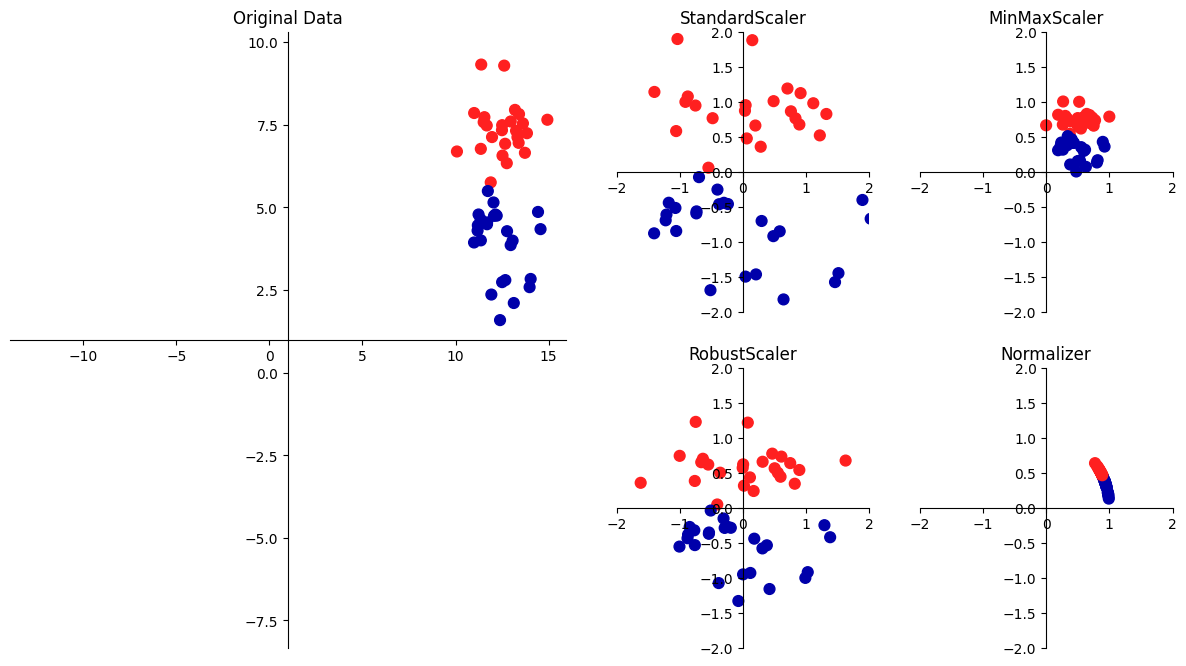

In [2]:
mglearn.plots.plot_scaling()

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [5]:
scaler.fit(X_train)

MinMaxScaler()

In [6]:
# преобразовываем данные
X_train_scaled = scaler.transform(X_train)
# печатаем значения признаков в обучающем наборе до и после масштабирования
print("форма преобразованного массива: {}".format(X_train_scaled.shape))
print("min значение признака до масштабирования:\n {}".format(X_train.min(axis=0)))
print("max значение признака до масштабирования:\n {}".format(X_train.max(axis=0)))
print("min значение признака после масштабирования:\n {}".format(X_train_scaled.min(axis=0)))
print("max значение признака после масштабирования:\n {}".format(X_train_scaled.max(axis=0)))

форма преобразованного массива: (426, 30)
min значение признака до масштабирования:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
max значение признака до масштабирования:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
min значение признака после масштабирования:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
max значение признака после масштабирования:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1

In [7]:
# преобразовываем тестовые данные
X_test_scaled = scaler.transform(X_test)
# печатаем значения признаков в тестовом наборе после масштабирования
print("min значение признака после масштабирования:\n{}".format(X_test_scaled.min(axis=0)))
print("max значение признака после масштабирования:\n{}".format(X_test_scaled.max(axis=0)))

min значение признака после масштабирования:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
max значение признака после масштабирования:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


In [13]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Правильность на тестовом наборе: {:.2f}".format(svm.score(X_test, y_test)))

Правильность на тестовом наборе: 0.94


In [14]:
# предварительная обработка с помощью шкалирования 0-1
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# построение SVM на масштабированных обучающих данных
svm.fit(X_train_scaled, y_train)
# оценка правильности для масштабированного тестового набора
print("Правильность на масштабированном тестовом наборе: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Правильность на масштабированном тестовом наборе: 0.97


In [15]:
# предварительная обработка с помощью масштабирования
# нулевым средним и единичной дисперсией
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# построение SVM на масштабированных обучающих данных
svm.fit(X_train_scaled, y_train)
# оценка правильности для масштабированного тестового набора
print("Правильность SVM на тестовом наборе: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Правильность SVM на тестовом наборе: 0.96


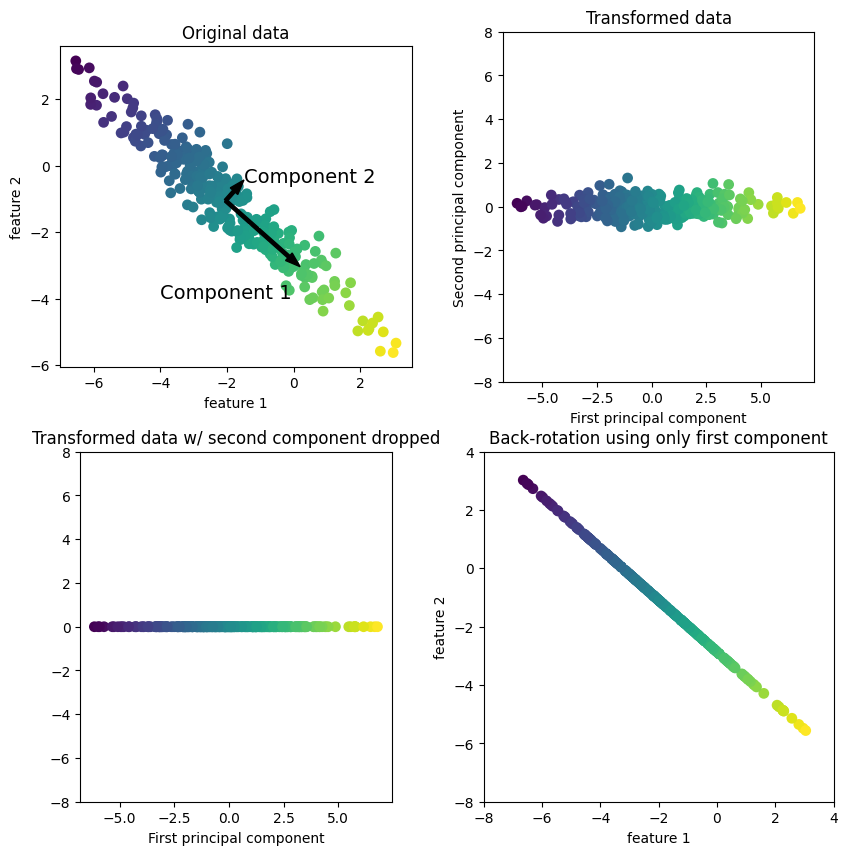

In [16]:
mglearn.plots.plot_pca_illustration()

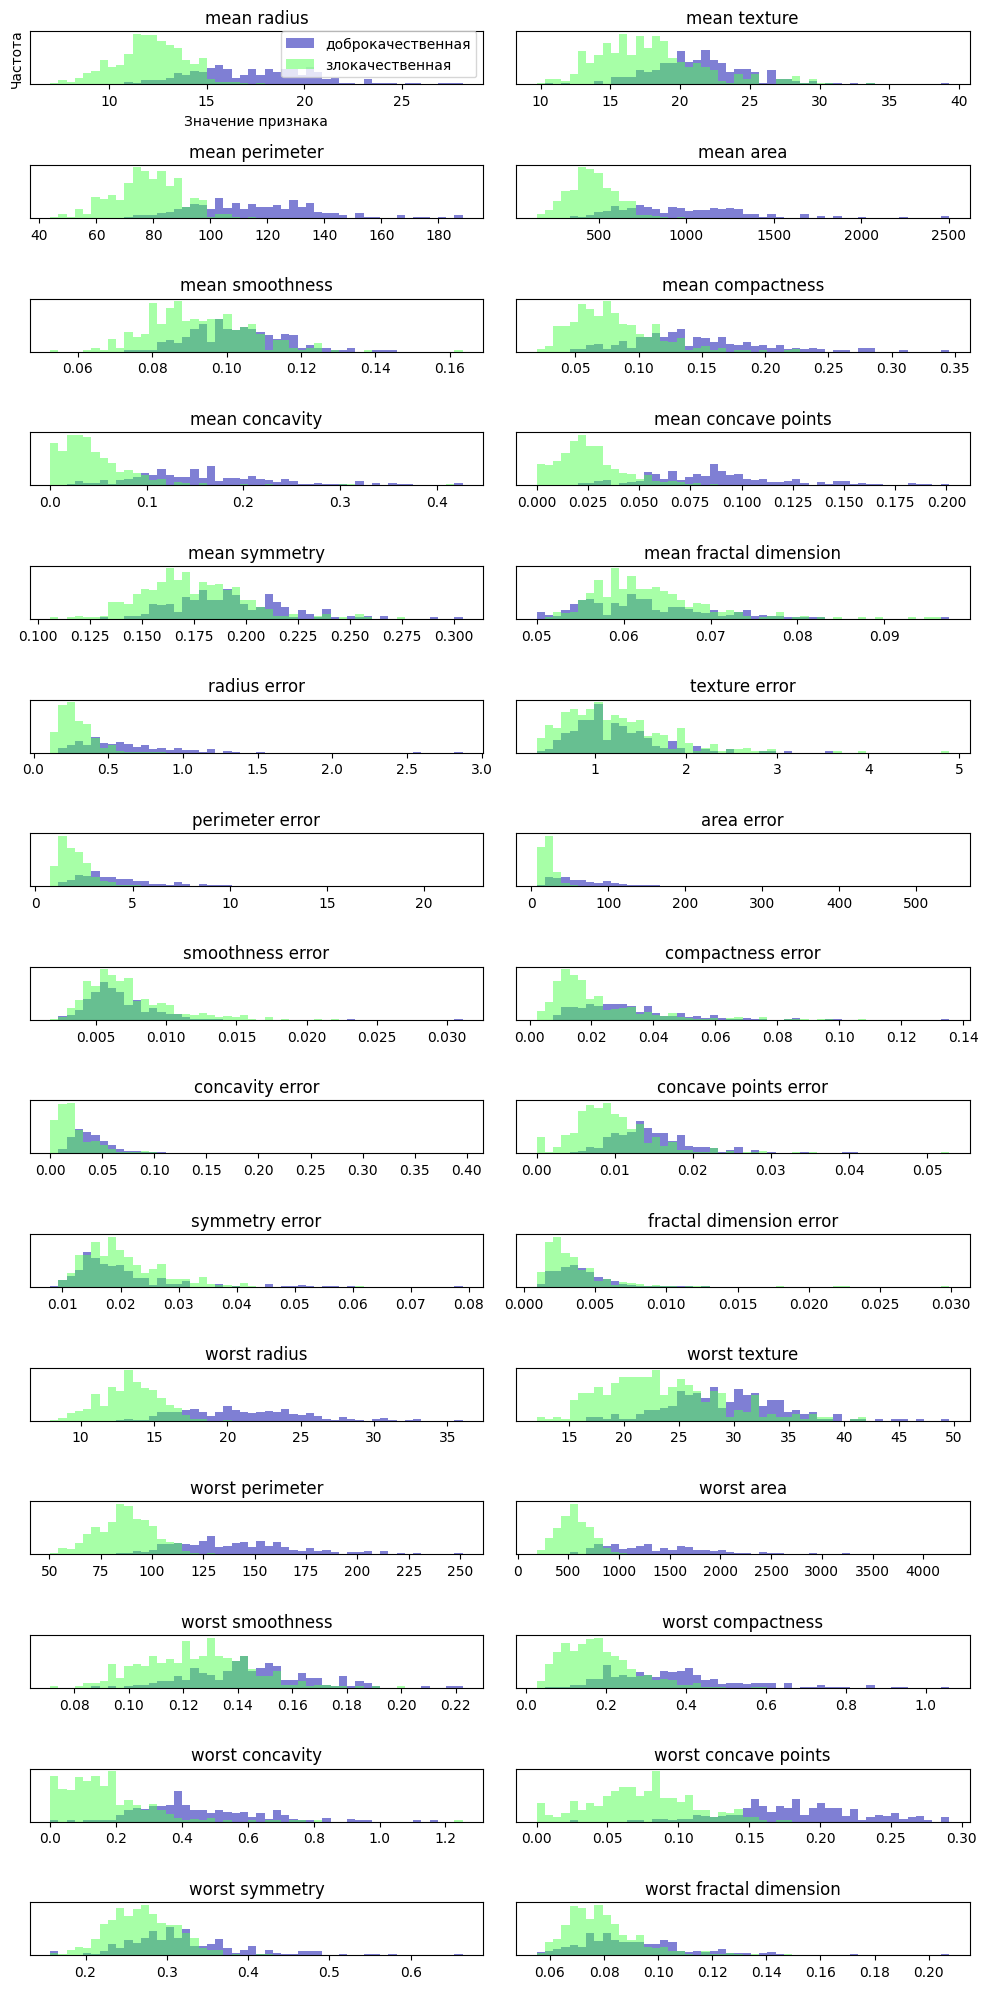

In [18]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel("Значение признака")
ax[0].set_ylabel("Частота")
ax[0].legend(["доброкачественная", "злокачественная"], loc="best")
fig.tight_layout()

In [19]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [20]:
from sklearn.decomposition import PCA
# оставляем первые две главные компоненты
pca = PCA(n_components=2)
# подгоняем модель PCA на наборе данных breast cancer
pca.fit(X_scaled)
# преобразуем данные к первым двум главным компонентам
X_pca = pca.transform(X_scaled)
print("Форма исходного массива: {}".format(str(X_scaled.shape)))
print("Форма массива после сокращения размерности: {}".format(str(X_pca.shape)))

Форма исходного массива: (569, 30)
Форма массива после сокращения размерности: (569, 2)


Text(0, 0.5, 'Вторая главная компонента')

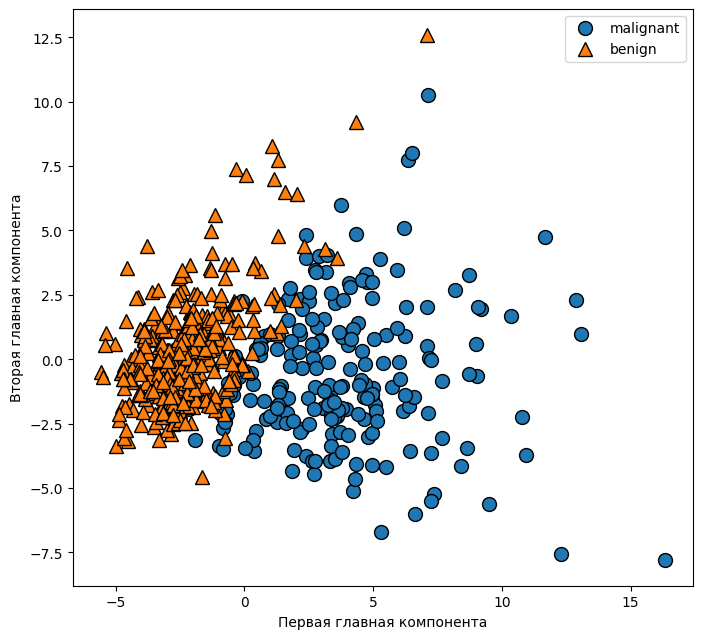

In [21]:
# строим график первых двух главных компонент, классы выделены цветом
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("Первая главная компонента")
plt.ylabel("Вторая главная компонента")

In [22]:
print("форма главных компонент: {}".format(pca.components_.shape))

форма главных компонент: (2, 30)


In [23]:
print("компоненты PCA:\n{}".format(pca.components_))

компоненты PCA:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Главные компоненты')

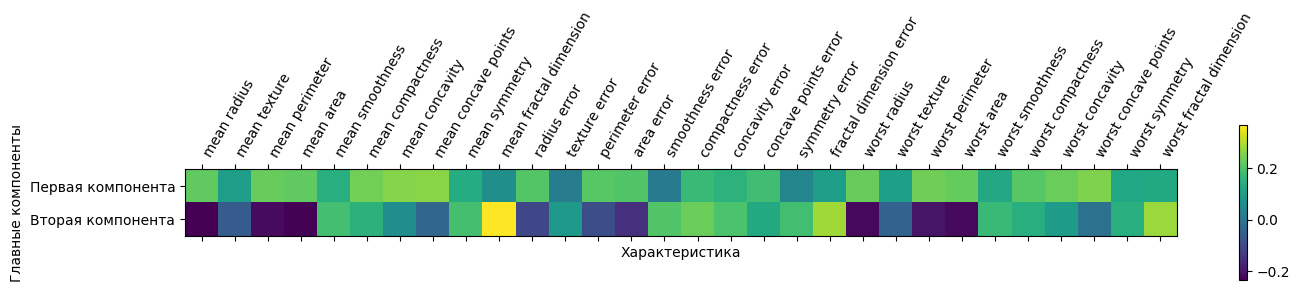

In [24]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["Первая компонента", "Вторая компонента"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Характеристика")
plt.ylabel("Главные компоненты")

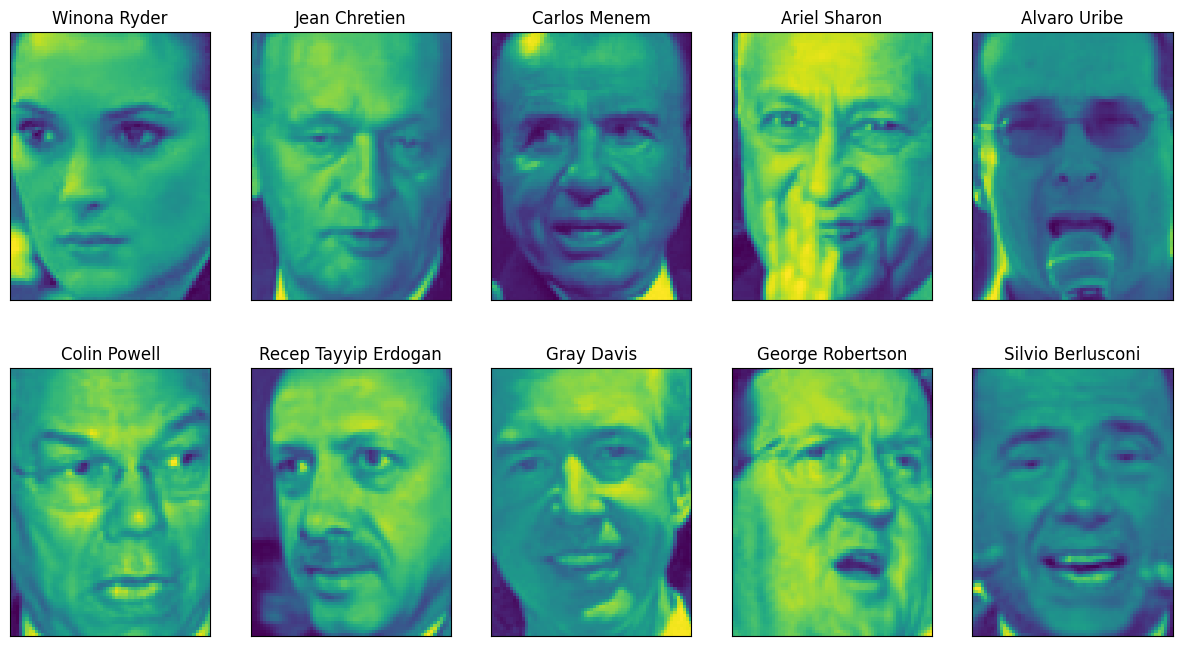

In [25]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
fix, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [26]:
print("форма массива изображений лиц: {}".format(people.images.shape))
print("количество классов: {}".format(len(people.target_names)))

форма массива изображений лиц: (3023, 87, 65)
количество классов: 62


In [27]:
# вычисляем частоту встречаемости каждого ответа
counts = np.bincount(people.target)

# печатаем частоты рядом с ответами
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end=' ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 John Ashcroft              53 John Negroponte            31 

In [28]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# для получения большей стабильности масштабируем шкалу оттенков серого так, чтобы значения
# были в диапазоне от 0 до 1 вместо использования шкалы значений от 0 до 255
X_people = X_people / 255.

In [29]:
from sklearn.neighbors import KNeighborsClassifier
# разбиваем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
# строим KNeighborsClassifier с одним соседом
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Правильность на тестовом наборе для 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

Правильность на тестовом наборе для 1-nn: 0.22


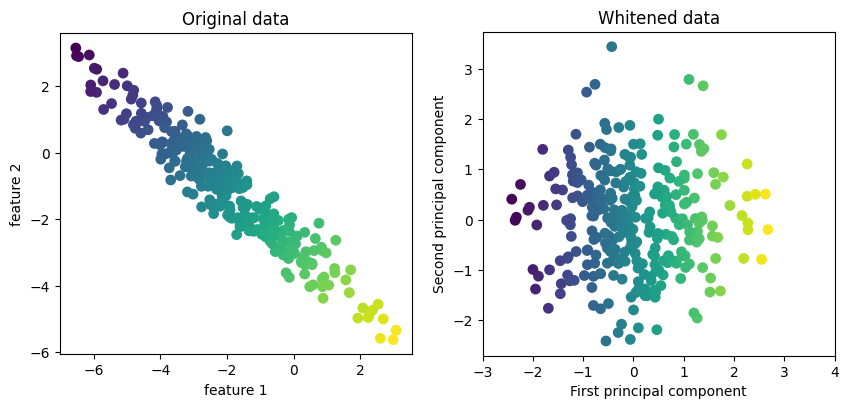

In [30]:
mglearn.plots.plot_pca_whitening()

In [31]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("обучающие данные после PCA: {}".format(X_train_pca.shape))

обучающие данные после PCA: (1547, 100)


In [32]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Правильность на тестовом наборе: {:.2f}".format(knn.score(X_test_pca, y_test)))

Правильность на тестовом наборе: 0.30


In [33]:
print("форма pca.components_: {}".format(pca.components_.shape))

форма pca.components_: (100, 5655)


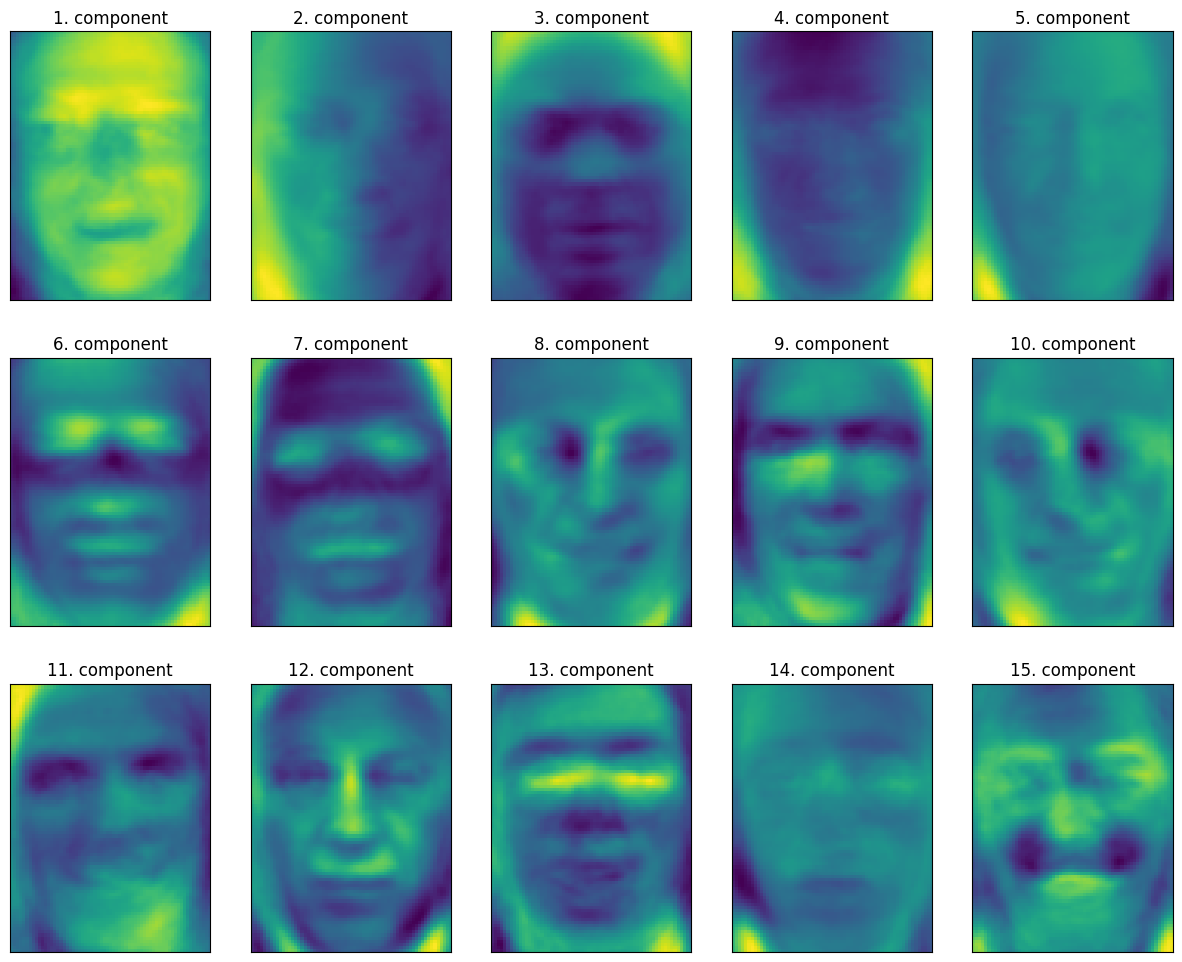

In [34]:
fix, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

Text(0, 0.5, 'Вторая главная компонента')

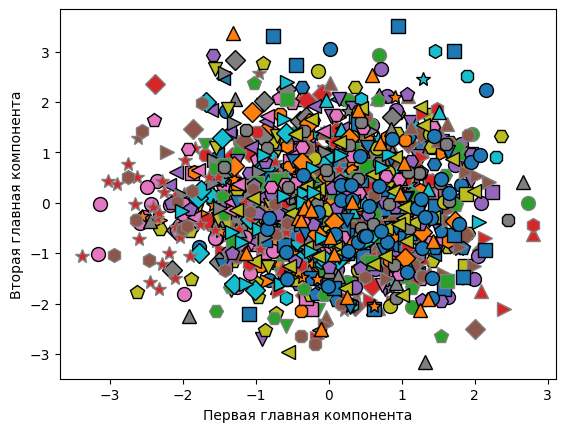

In [37]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("Первая главная компонента")
plt.ylabel("Вторая главная компонента")

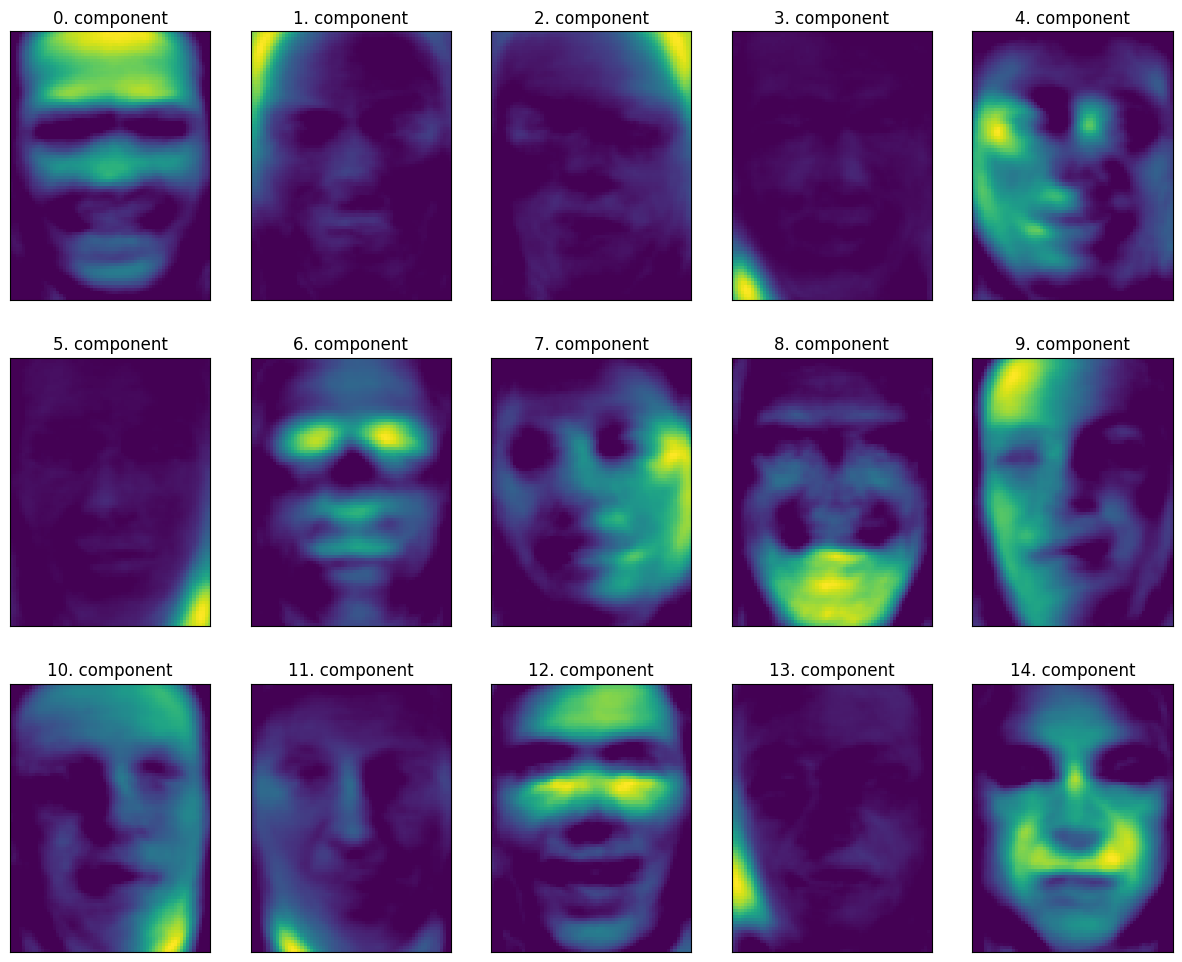

In [42]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0, max_iter=100000)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)
fix, axes = plt.subplots(3, 5, figsize=(15, 12),
subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

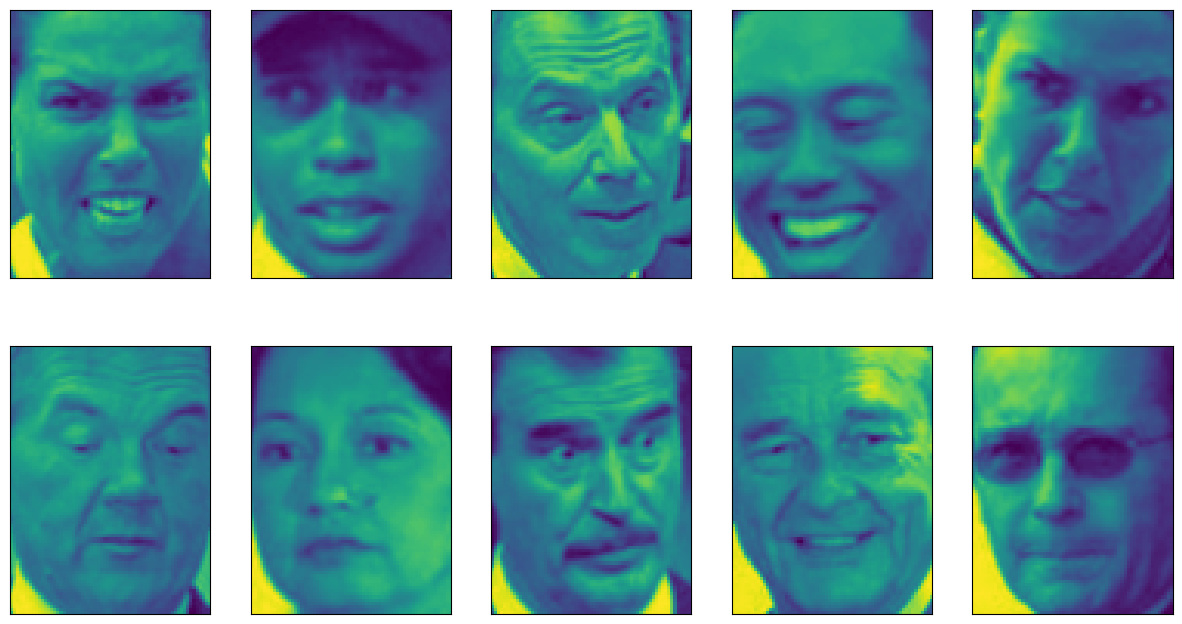

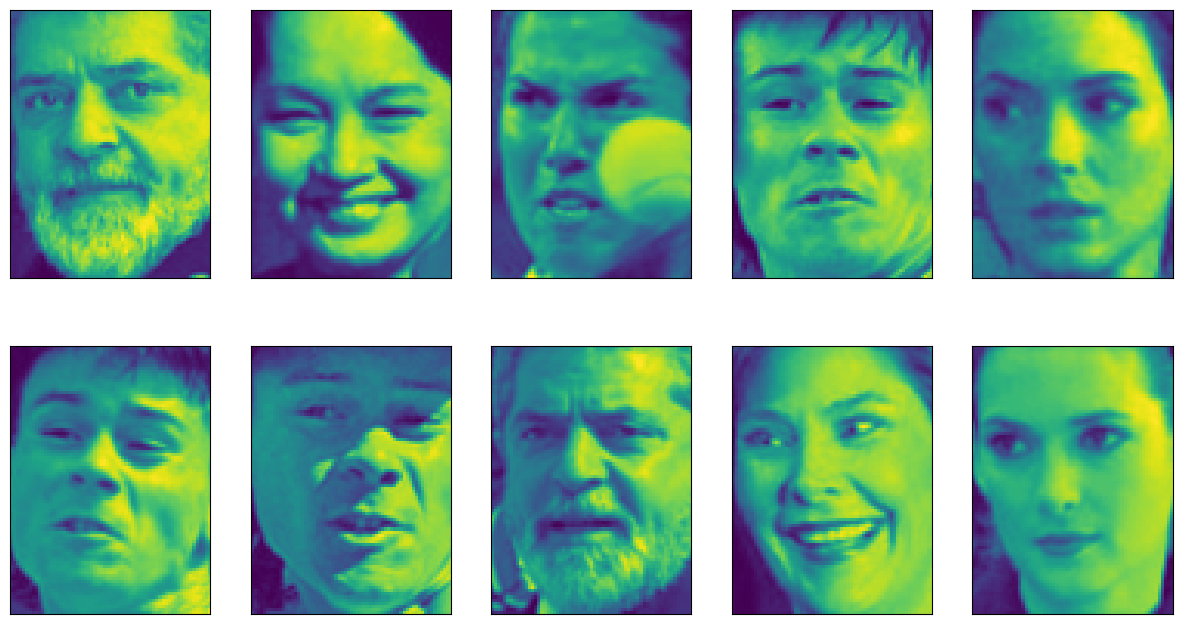

In [43]:
compn = 3
# сортируем по 3-й компоненте, выводим первые 10 изображений
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})

for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

compn = 7
# сортируем по 7-й компоненте, выводим первые 10 изображений
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})

for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

Text(0, 0.5, 'Сигнал')

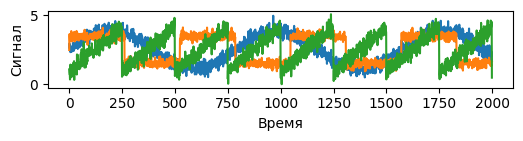

In [44]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel("Время")
plt.ylabel("Сигнал")

In [45]:
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("Форма измерений: {}".format(X.shape))

Форма измерений: (2000, 100)


In [46]:
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("Форма восстановленного сигнала: {}".format(S_.shape))

Форма восстановленного сигнала: (2000, 3)


In [47]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

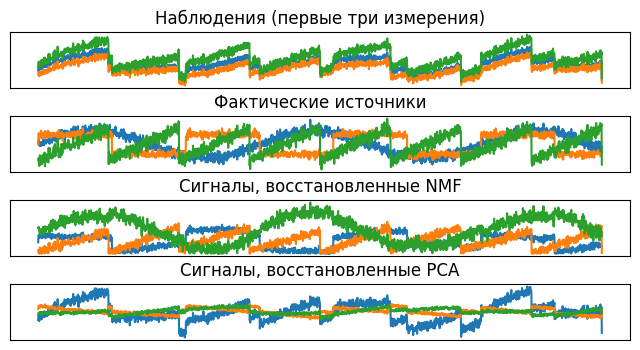

In [48]:
models = [X, S, S_, H]
names = ['Наблюдения (первые три измерения)', 'Фактические источники', 
         'Сигналы, восстановленные NMF', 'Сигналы, восстановленные PCA']
fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5}, subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

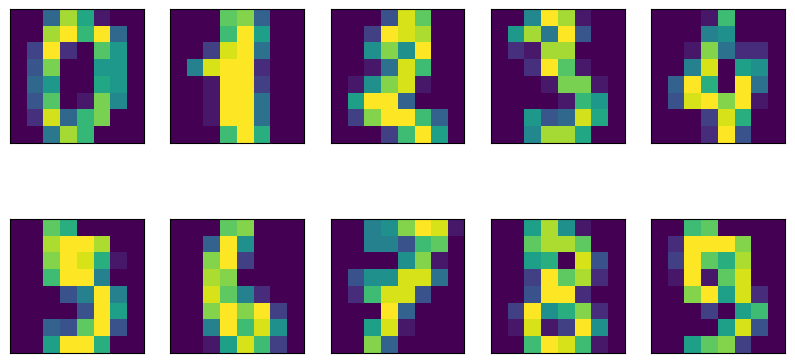

In [49]:
from sklearn.datasets import load_digits
digits = load_digits()
fig, axes = plt.subplots(2, 5, figsize=(10, 5),
subplot_kw={'xticks':(), 'yticks': ()})

for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

Text(0, 0.5, 'Вторая главная компонента')

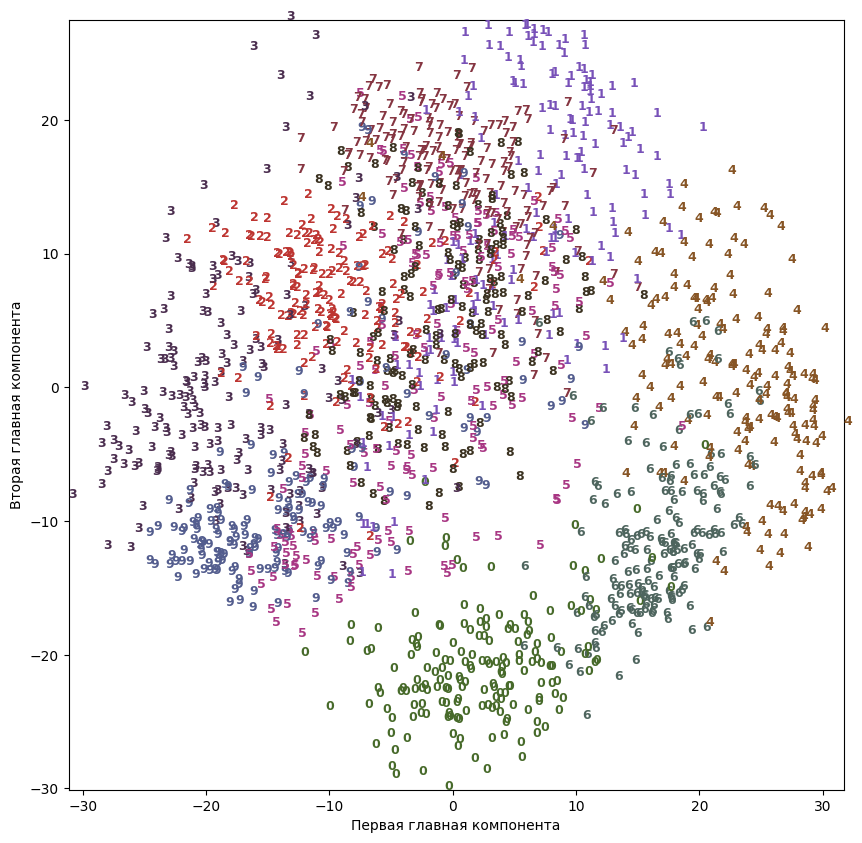

In [50]:
# строим модель PCA
pca = PCA(n_components=2)
pca.fit(digits.data)
# преобразуем данные рукописных цифр к первым двум компонентам
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())

for i in range(len(digits.data)):
    # строим график, где цифры представлены символами вместо точек
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]), color = colors[digits.target[i]], 
             fontdict={'weight': 'bold', 'size': 9})

plt.xlabel("Первая главная компонента")
plt.ylabel("Вторая главная компонента")

In [51]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# используем метод fit_transform вместо fit, т.к. класс TSNE не использует метод transform
digits_tsne = tsne.fit_transform(digits.data)

Text(0.5, 0, 't-SNE признак 1')

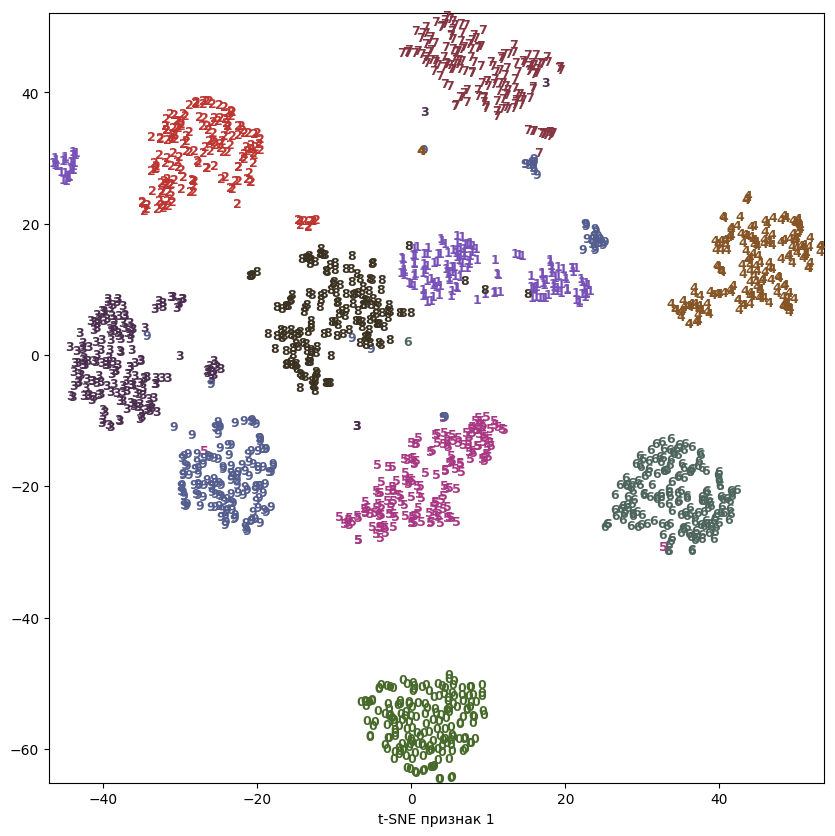

In [52]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)

for i in range(len(digits.data)):
    # строим график, где цифры представлены символами вместо точек
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]), color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})

plt.xlabel("t-SNE признак 0")
plt.xlabel("t-SNE признак 1")

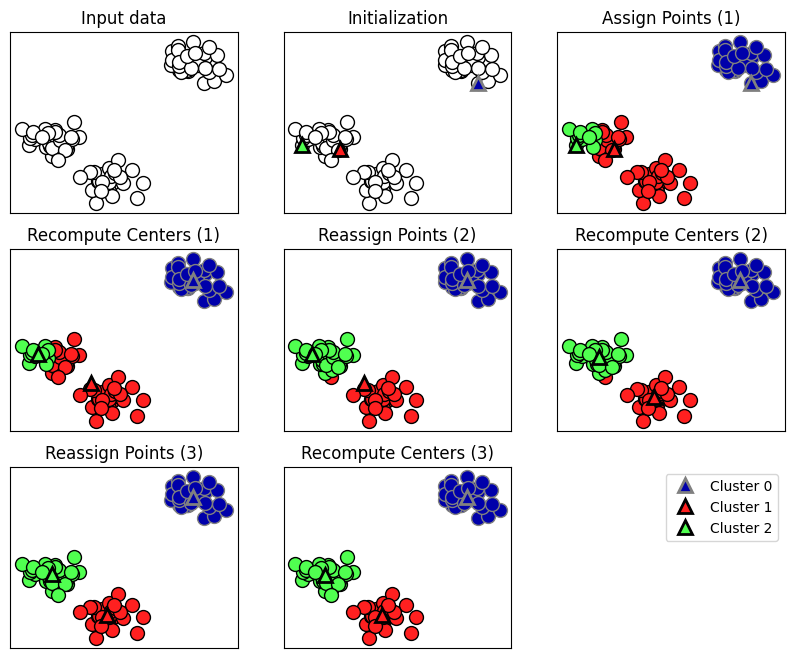

In [53]:
mglearn.plots.plot_kmeans_algorithm()

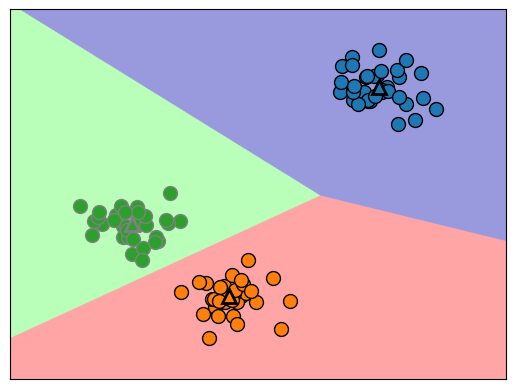

In [54]:
mglearn.plots.plot_kmeans_boundaries()

In [55]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
# генерируем синтетические двумерные данные
X, y = make_blobs(random_state=1)
# строим модель кластеризации
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [56]:
print("Принадлежность к кластерам:\n{}".format(kmeans.labels_))

Принадлежность к кластерам:
[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


In [57]:
print(kmeans.predict(X))

[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


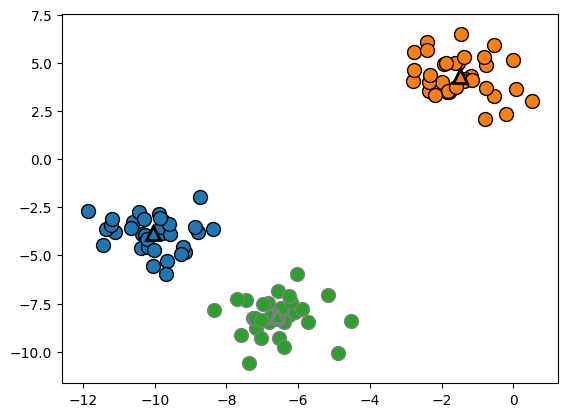

In [58]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2], markers='^', markeredgewidth=2)

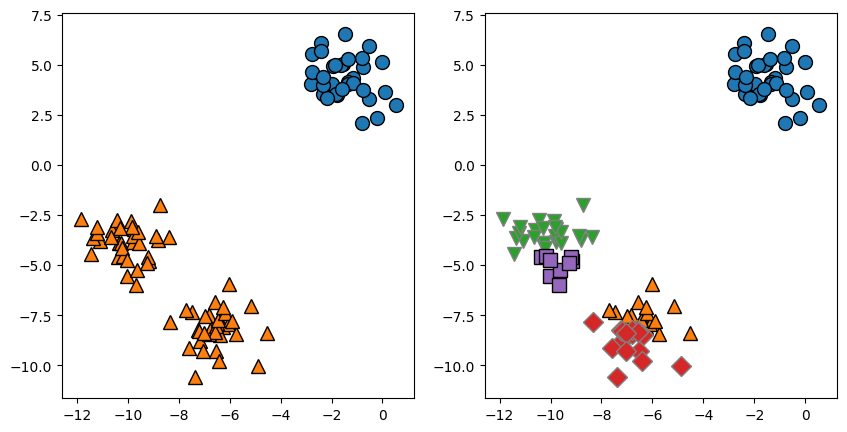

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# использование двух центров кластеров:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])
# использование пяти центров кластеров:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

Text(0, 0.5, 'Признак 1')

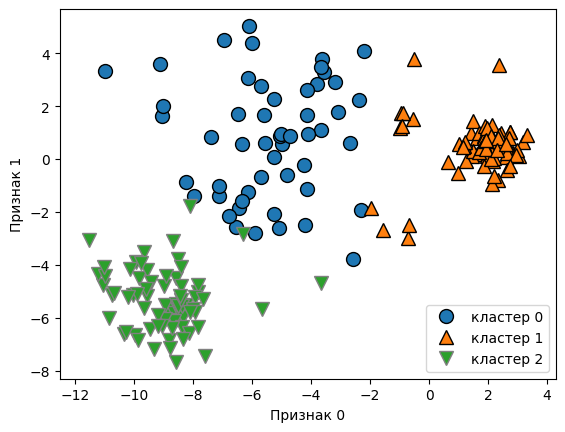

In [60]:
X_varied, y_varied = make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5], random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["кластер 0", "кластер 1", "кластер 2"], loc='best')
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

Text(0, 0.5, 'Признак 1')

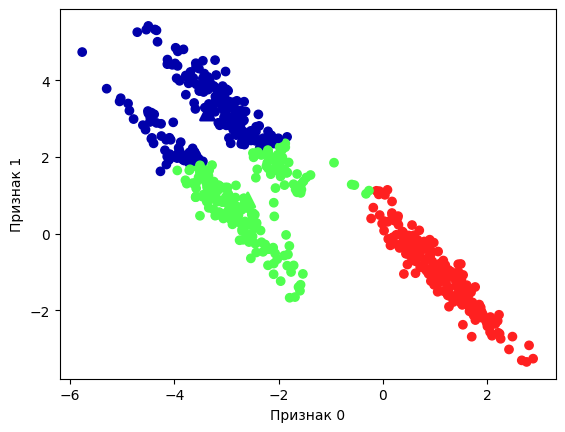

In [61]:
# генерируем случайным образом данные для кластеризации
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# преобразуем данные так, чтобы они были вытянуты по диагонали
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# группируем данные в три кластера
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# строим график принадлежности к кластерам и центров кластеров
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[0, 1, 2], s=100, linewidth=2, cmap=mglearn.cm3)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

Text(0, 0.5, 'Признак 1')

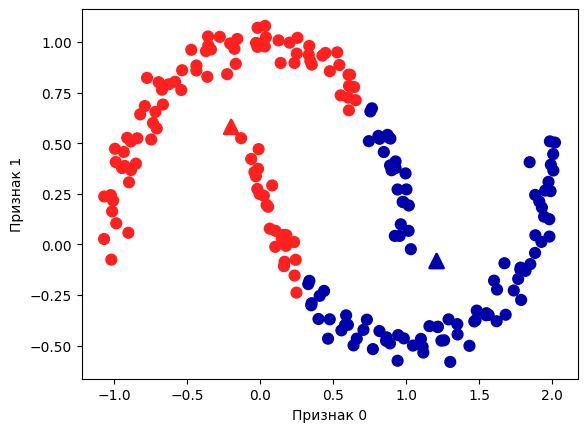

In [62]:
# генерируем синтетические данные two_moons (на этот раз с меньшим количеством шума)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# группируем данные в два кластера
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# строим график принадлежности к кластерам и центров кластеров
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

nmf = NMF(n_components=100, random_state=0, max_iter=100000)
nmf.fit(X_train)

pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)

kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

Text(0, 0.5, 'nmf')

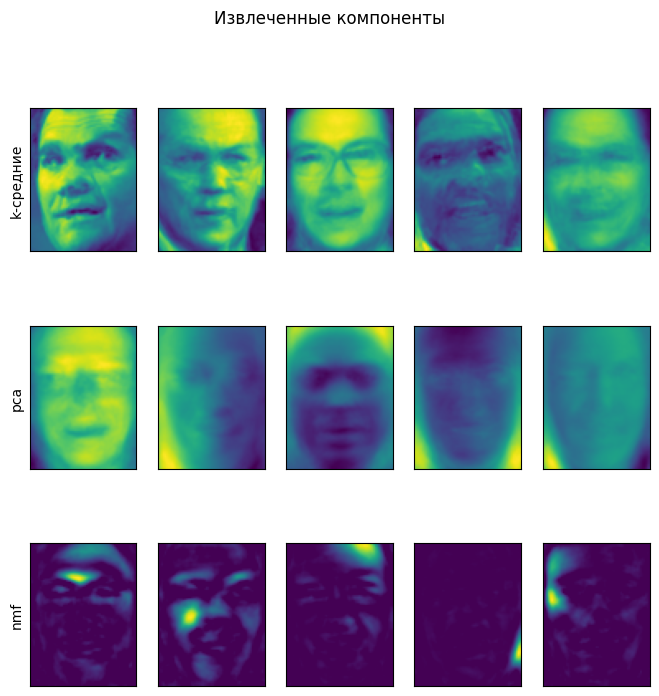

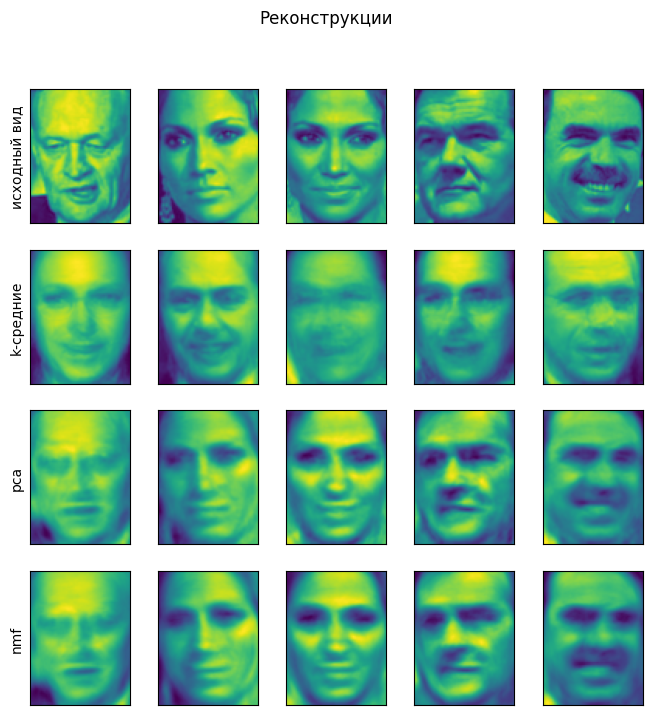

In [65]:
fig, axes = plt.subplots(3, 5, figsize=(8, 8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Извлеченные компоненты")

for ax, comp_kmeans, comp_pca, comp_nmf in zip(axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))
    
axes[0, 0].set_ylabel("k-средние")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(8, 8))
fig.suptitle("Реконструкции")

for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(axes.T, X_test, X_reconstructed_kmeans, 
                                                  X_reconstructed_pca, X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))
    
axes[0, 0].set_ylabel("исходный вид")
axes[1, 0].set_ylabel("k-средние")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")
    

Принадлежность к кластерам:
[8 4 6 3 1 1 5 2 8 4 9 2 1 4 7 5 0 2 0 7 1 2 0 4 9 6 1 1 6 0 8 9 2 6 8 1 2
 5 3 6 2 7 8 6 4 9 5 7 6 2 7 2 1 3 4 8 0 4 0 9 2 3 1 8 4 3 9 4 9 3 2 3 2 6
 2 3 6 8 0 2 1 9 2 1 6 9 5 9 2 1 0 5 1 7 1 1 4 2 3 6 4 1 9 5 3 6 3 7 4 0 7
 9 9 3 8 4 8 1 2 8 8 7 6 9 6 7 5 6 4 1 5 7 3 6 4 4 4 3 1 8 6 6 0 9 7 5 6 4
 0 6 2 4 8 0 2 9 4 2 0 0 6 4 0 4 2 1 0 2 4 2 0 3 3 7 6 2 1 7 7 0 4 3 1 4 1
 0 9 2 3 7 3 0 8 5 6 7 1 6 9 4]


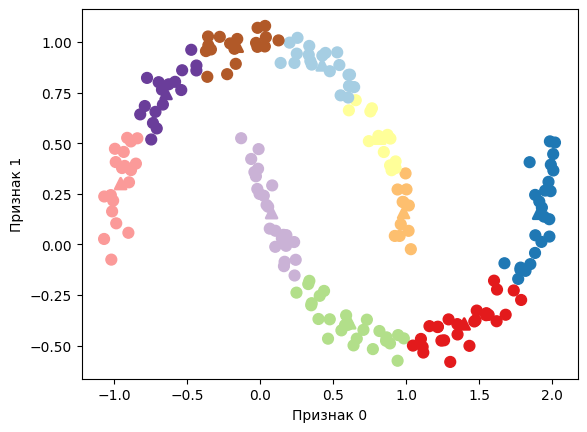

In [66]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)

y_pred = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60, 
            marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')

plt.xlabel("Признак 0")
plt.ylabel("Признак 1")
print("Принадлежность к кластерам:\n{}".format(y_pred))

In [67]:
distance_features = kmeans.transform(X)
print("Форма характеристик-расстояний: {}".format(distance_features.shape))
print("Характеристики-расстояния:\n{}".format(distance_features))

Форма характеристик-расстояний: (200, 10)
Характеристики-расстояния:
[[0.53664613 1.15017588 0.93237626 ... 1.48034956 0.002907   1.07736639]
 [1.74138152 0.60592307 1.00666225 ... 2.52921971 1.20779969 2.23716489]
 [0.75710543 1.93145038 0.91586549 ... 0.78321505 0.87573753 0.71838465]
 ...
 [0.9274342  1.73811046 0.57899268 ... 1.11471941 0.83358544 1.04125672]
 [0.3227627  1.97647071 1.47861069 ... 0.81425026 0.84551232 0.28446737]
 [1.63322944 0.47226506 1.02289983 ... 2.46626118 1.09767675 2.14812753]]


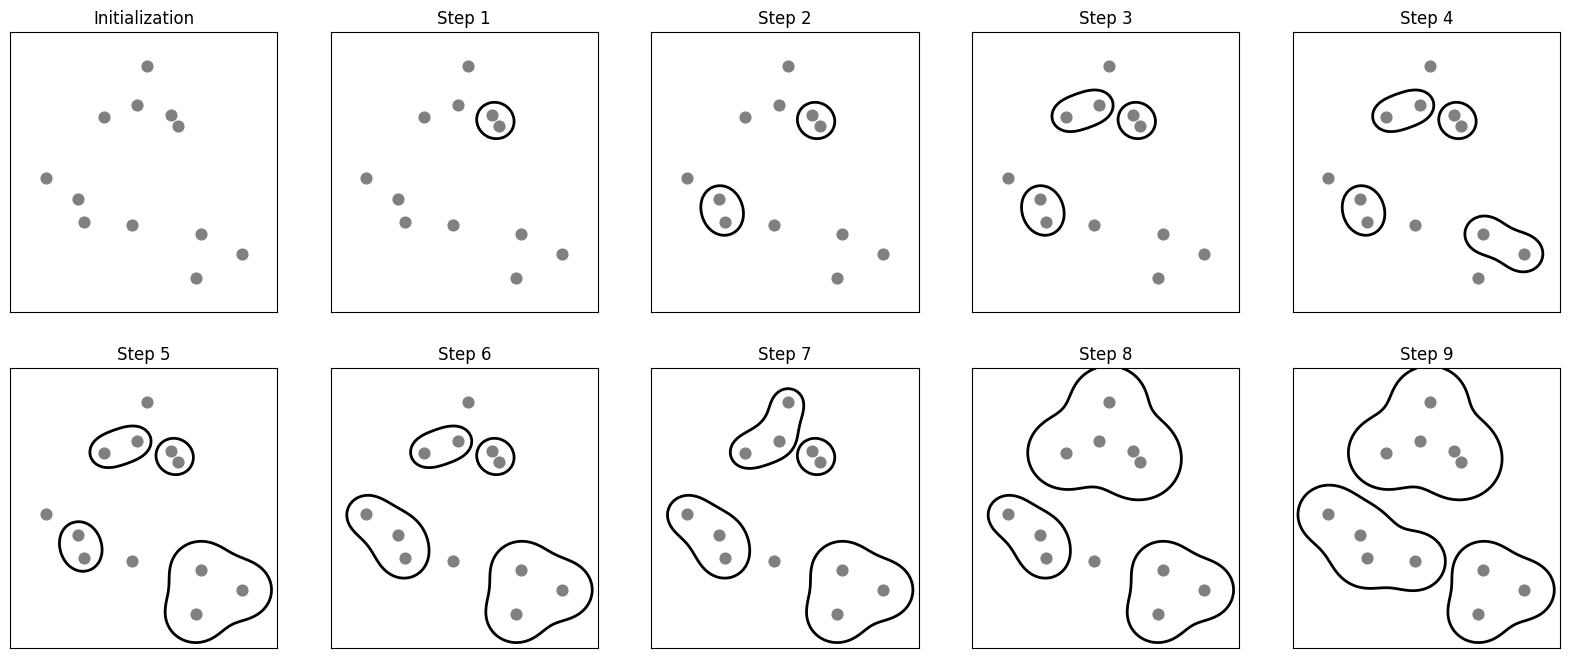

In [68]:
mglearn.plots.plot_agglomerative_algorithm()

Text(0, 0.5, 'Признак 1')

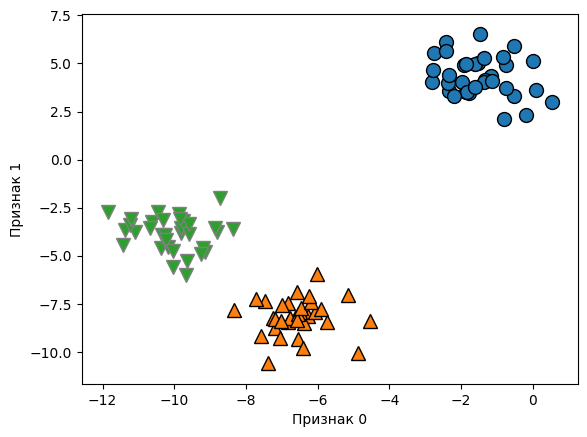

In [69]:
from sklearn.cluster import AgglomerativeClustering

X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)

plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

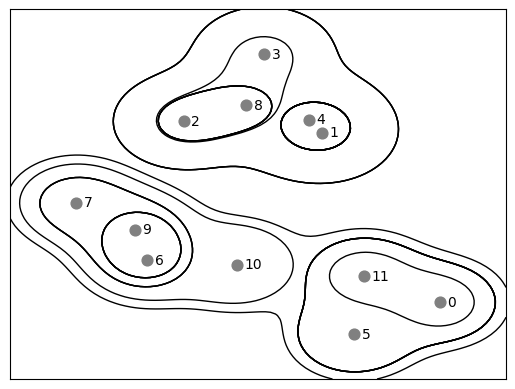

In [70]:
mglearn.plots.plot_agglomerative()

Text(0, 0.5, 'Кластерное расстояние')

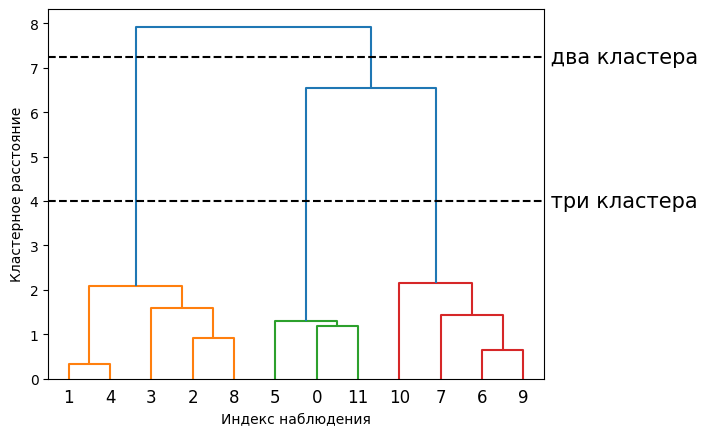

In [71]:
# импортируем функцию dendrogram и функцию кластеризации ward из SciPy
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)

# применяем кластеризацию ward к массиву данных X
# функция SciPy ward возвращает массив с расстояниями
# вычисленными в ходе выполнения агломеративной кластеризации
linkage_array = ward(X)

# теперь строим дендрограмму для массива связей, содержащего расстояния
# между кластерами
dendrogram(linkage_array)

# делаем отметки на дереве, соответствующие двум или трем кластерам
ax = plt.gca()
bounds = ax.get_xbound()

ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')
ax.text(bounds[1], 7.25, ' два кластера', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' три кластера', va='center', fontdict={'size': 15})

plt.xlabel("Индекс наблюдения")
plt.ylabel("Кластерное расстояние")

In [72]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("Принадлежность к кластерам:\n{}".format(clusters))

Принадлежность к кластерам:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


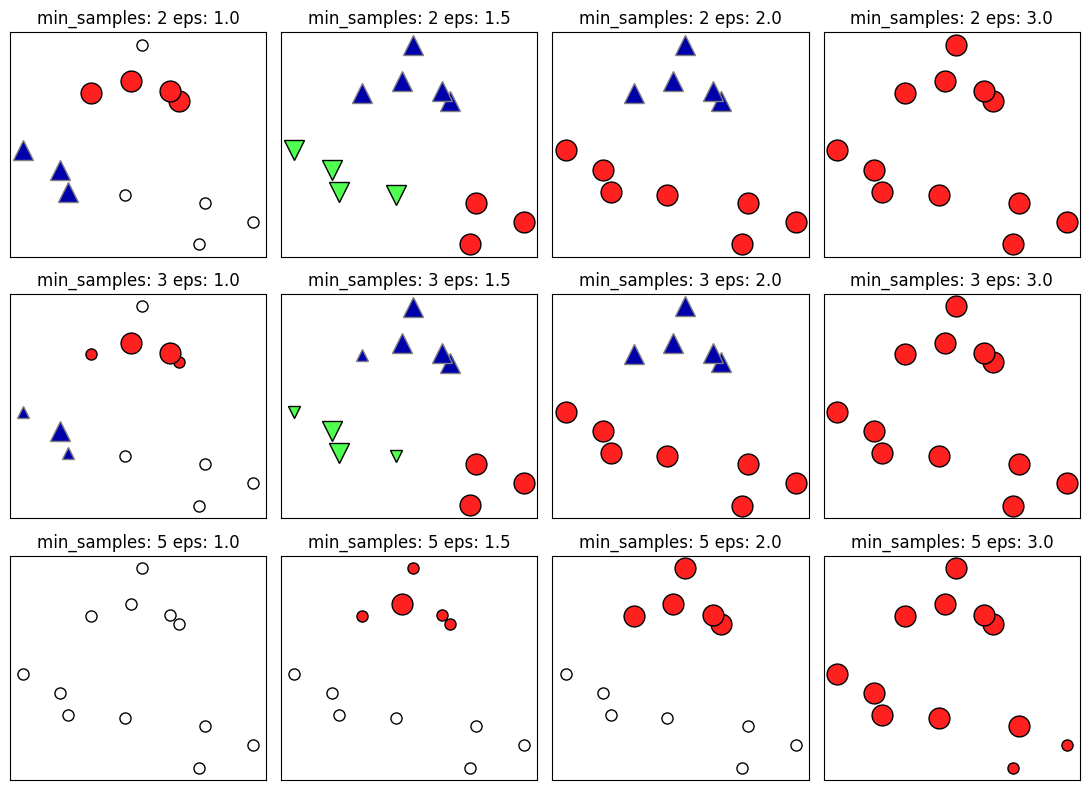

In [73]:
mglearn.plots.plot_dbscan()

Text(0, 0.5, 'Признак 1')

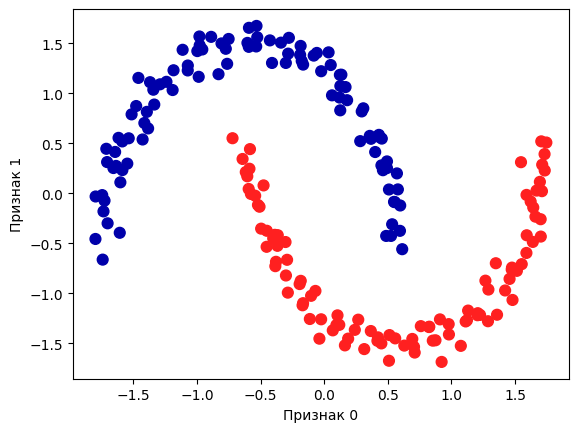

In [74]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# масштабируем данные так, чтобы получить нулевое среднее и единичную дисперсию
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

# выводим принадлежность к кластерам
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

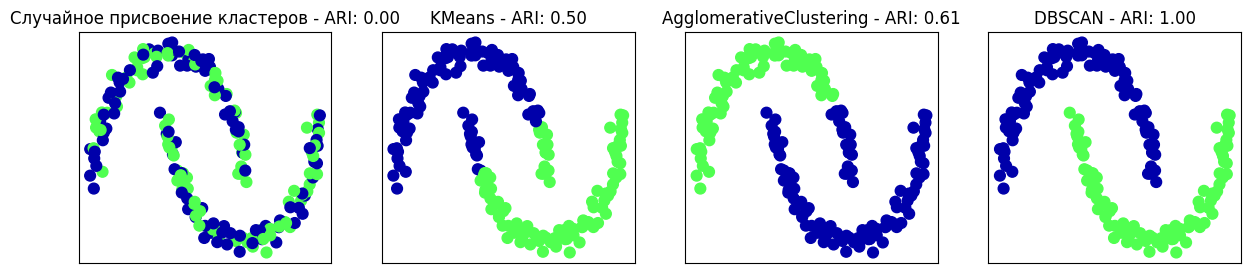

In [75]:
from sklearn.metrics.cluster import adjusted_rand_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# масштабируем данные так, чтобы получить нулевое среднее и единичную дисперсию
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

# создаем список используемых алгоритмов
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

# случайно присваиваем точки двум кластерам для сравнения
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# выводим на графике результаты случайного присвоения кластеров
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title("Случайное присвоение кластеров - ARI: {:.2f}".format(
adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # выводим на графике принадлежность к кластерам и центры кластеров
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__, adjusted_rand_score(y, clusters)))

In [76]:
from sklearn.metrics import accuracy_score
# эти две маркировки точек соответствуют одним и тем же результатам кластеризации
# в clusters1 записаны фактические результаты кластеризации,
# а в clusters2 записаны расчетные результаты кластеризации
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]

# правильность равна нулю, поскольку ни одна из присвоенных меток не отражает
# истинную кластеризацию
print("Правильность: {:.2f}".format(accuracy_score(clusters1, clusters2)))

# значение скорр. коэффициента Рэнда равно 1, поскольку полученные результаты
# точно воспроизводят истинную кластеризацию
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

Правильность: 0.00
ARI: 1.00


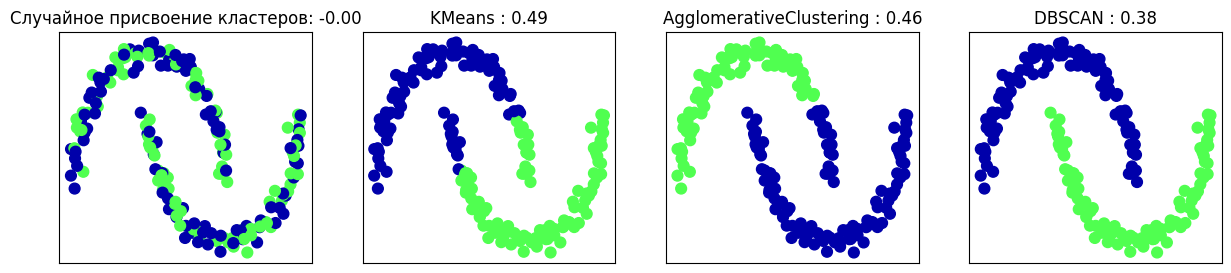

In [77]:
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# масштабируем данные так, чтобы получить нулевое среднее и единичную дисперсию
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

# случайно присваиваем точки двум кластерам для сравнения
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# выводим на графике результаты случайного присвоения кластеров
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title("Случайное присвоение кластеров: {:.2f}".format(silhouette_score(X_scaled, random_clusters)))
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # выводим на графике принадлежность к кластерам и центры кластеров
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__, silhouette_score(X_scaled, clusters)))

In [78]:
# извлекаем собственные лица для набора данных lfw и преобразуем данные
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit_transform(X_people)
X_pca = pca.transform(X_people)

In [79]:
# применяем алгоритм DBSCAN, используя параметры по умолчанию
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("Уникальные метки: {}".format(np.unique(labels)))

Уникальные метки: [-1]


In [80]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print("Уникальные метки: {}".format(np.unique(labels)))

Уникальные метки: [-1]


In [81]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print("Уникальные метки: {}".format(np.unique(labels)))

Уникальные метки: [-1  0]


In [82]:
# Считаем количество точек в кластерах и шум.
# bincount не допускает отрицательных цифр, поэтому нам нужно добавить 1.
# Первая цифра в выводе соответствует количеству шумовых точек.
print("Количество точек на кластер: {}".format(np.bincount(labels + 1)))

Количество точек на кластер: [  37 2026]


In [84]:
for eps in [1, 3, 5, 7, 9, 11, 13]:
    print("\neps={}".format(eps))
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    print("Полученные кластеры: {}".format(np.unique(labels)))
    print("Размеры кластеров: {}".format(np.bincount(labels + 1)))


eps=1
Полученные кластеры: [-1]
Размеры кластеров: [2063]

eps=3
Полученные кластеры: [-1]
Размеры кластеров: [2063]

eps=5
Полученные кластеры: [-1  0]
Размеры кластеров: [2059    4]

eps=7
Полученные кластеры: [-1  0  1  2  3  4  5  6]
Размеры кластеров: [1954   75    4   14    6    4    3    3]

eps=9
Полученные кластеры: [-1  0  1]
Размеры кластеров: [1199  861    3]

eps=11
Полученные кластеры: [-1  0]
Размеры кластеров: [ 403 1660]

eps=13
Полученные кластеры: [-1  0]
Размеры кластеров: [ 119 1944]


In [86]:
# извлекаем кластеры с помощью k-средних
km = KMeans(n_clusters=10, random_state=0)
labels_km = km.fit_predict(X_pca)
print("Размеры кластеров k-средние: {}".format(np.bincount(labels_km)))

Размеры кластеров k-средние: [  5 286 190 275 185 493   1 286   2 340]


In [89]:
# извлекаем кластеры с помощью агломеративной кластеризации по методу Варда
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)
print("Размеры кластеров для агломеративной кластеризации: {}".format(np.bincount(labels_agg)))

Размеры кластеров для агломеративной кластеризации: [264 100 275 553  49  64 546  52  51 109]


In [90]:
print("ARI: {:.2f}".format(adjusted_rand_score(labels_agg, labels_km)))

ARI: 0.09


Text(0, 0.5, 'Кластерное расстояние')

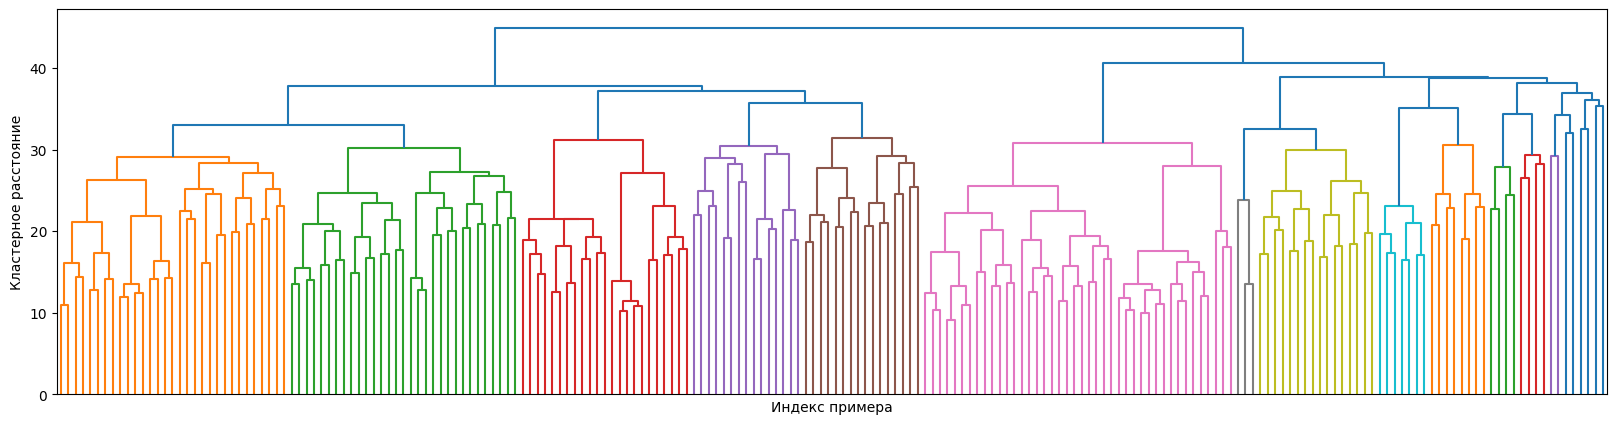

In [91]:
linkage_array = ward(X_pca)
# строим дендрограмму для linkage_array
# содержащего расстояния между кластерами
plt.figure(figsize=(20, 5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)
plt.xlabel("Индекс примера")
plt.ylabel("Кластерное расстояние")